In [1]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [2]:
keywords=['lesti']
start="2022–10–01"
end ="2022–10–16"
max_num=200
fname='snscrape.json' 
languages=['id']

In [3]:
twitter_data = []

for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            
            twitter_data.append(data['text'])
            
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

C:\Users\syahf\AppData\Local\Temp\ipykernel_7716\3318082607.py:14: FutureWarning: username is deprecated, use user.username instead
  data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}


{"id": 1581936442527604736, "username": "AAfantu", "date": "2022-10-17 09:13:33+00:00", "text": "@indosupporter Malah makin lucu ini ? Sebagian jadi korban tapi yg kriminalitas seolah mengumpat jadi korban. Makin lucu Aremania kalo bersikap gini mirip eps Lesti 2. Proses sedang dilakukan suporter kriminal tetap usut tuntas! Ga nyadar apa itu oknum yg mencemari nama Aremania mu juga", "url": "https://twitter.com/AAfantu/status/1581936442527604736"}
{"id": 1581936067665571841, "username": "LestiBilar05", "date": "2022-10-17 09:12:04+00:00", "text": "@Shill_Ronin Semoga lancar ibadahnya ya bang, semoga aku dan keluarga kecilku bisa nyusul ke tanah suci Aamiin Yra 🤲", "url": "https://twitter.com/LestiBilar05/status/1581936067665571841"}
{"id": 1581936045066661888, "username": "HaikalAdnan95", "date": "2022-10-17 09:11:58+00:00", "text": "@convomf Udah ga ngerti lagi sama lesti https://t.co/iJKcD9yKXr", "url": "https://twitter.com/HaikalAdnan95/status/1581936045066661888"}
{"id": 1581935636

In [4]:
twitter_data

['@indosupporter Malah makin lucu ini ? Sebagian jadi korban tapi yg kriminalitas seolah mengumpat jadi korban. Makin lucu Aremania kalo bersikap gini mirip eps Lesti 2. Proses sedang dilakukan suporter kriminal tetap usut tuntas! Ga nyadar apa itu oknum yg mencemari nama Aremania mu juga',
 '@Shill_Ronin Semoga lancar ibadahnya ya bang, semoga aku dan keluarga kecilku bisa nyusul ke tanah suci Aamiin Yra 🤲',
 '@convomf Udah ga ngerti lagi sama lesti https://t.co/iJKcD9yKXr',
 'Kuasa Hukum Rizky Billar Philipus Sitepu menyebut Lesti sudah mencabut laporan dugaan KDRT, Kamis (13/10). Lesti Kejora dan Rizky Billar sudah sepakat berdamai, bahkan keduanya sudah saling memaafkan. https://t.co/SB8WfKKHG6',
 'Rujit muka tv asa si lesti deui si lesti deui .. Euweuh nu lain kitu asa jiga superstar weh ajig',
 'Kmrn 40 harian abah, tetep aja ada bahasan ttg lesti🤣',
 '@sbyfess Pliss jangan jd bucin tolol. Anda ini sudah seperti lesti. Bodoh',
 'Bila tidak ada bantuan psikiater, Denny Darko yakin

In [5]:
import re
import string

In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [7]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [8]:
documents_clean=[]
for data in twitter_data:
    outputstem= stemmer.stem(data)
    l= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', data)
    # Remove Mentions
    document_test = re.sub(r'http\S+', '', document_test)
    # Remove links
    document_test = re.sub(r'^https?:\/\/.*[\r\n]*', '', document_test, flags=re.MULTILINE)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [9]:
documents_clean

[' indosupporter malah makin lucu ini sebagian jadi korban tapi yg kriminalitas seolah mengumpat jadi korban makin lucu aremania kalo bersikap gini mirip eps lesti proses sedang dilakukan suporter kriminal tetap usut tuntas ga nyadar apa itu oknum yg mencemari nama aremania mu juga',
 ' shill ronin semoga lancar ibadahnya ya bang semoga aku dan keluarga kecilku bisa nyusul ke tanah suci aamiin yra ',
 ' convomf udah ga ngerti lagi sama lesti ',
 'kuasa hukum rizky billar philipus sitepu menyebut lesti sudah mencabut laporan dugaan kdrt kamis lesti kejora dan rizky billar sudah sepakat berdamai bahkan keduanya sudah saling memaafkan ',
 'rujit muka tv asa si lesti deui si lesti deui euweuh nu lain kitu asa jiga superstar weh ajig',
 'kmrn harian abah tetep aja ada bahasan ttg lesti ',
 ' sbyfess pliss jangan jd bucin tolol anda ini sudah seperti lesti bodoh',
 'bila tidak ada bantuan psikiater denny darko yakin rizky billar akan mengulang kesalahan yang sama ke lesti kejora ',
 'sbnrnya

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

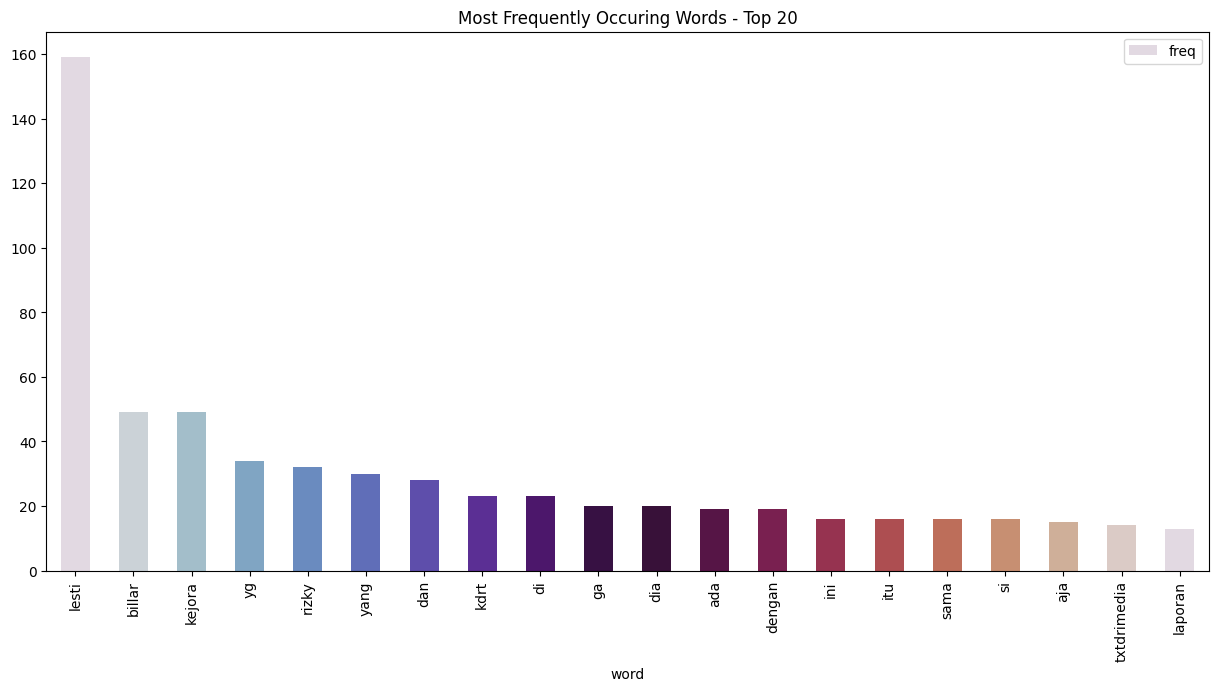

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [12]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [13]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names_out()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 yang
 dia
 lesti
 itu
 billar
 kita
 baik
 jd
 ga
 sendiri
Cluster 1:
 lesti
 kejora
 billar
 rizky
 kdrt
 dengan
 laporan
 dan
 yang
 cabut
Cluster 2:
 lesti
 yg
 di
 dan
 ga
 yang
 ada
 dia
 si
 aja




In [14]:
print("Prediction")
Y = cv.transform(["piala dunia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ronaldo"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [2]
Cluster number : [2]


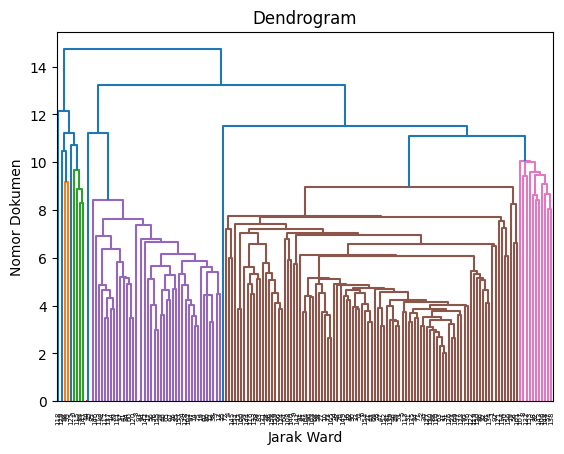

In [15]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

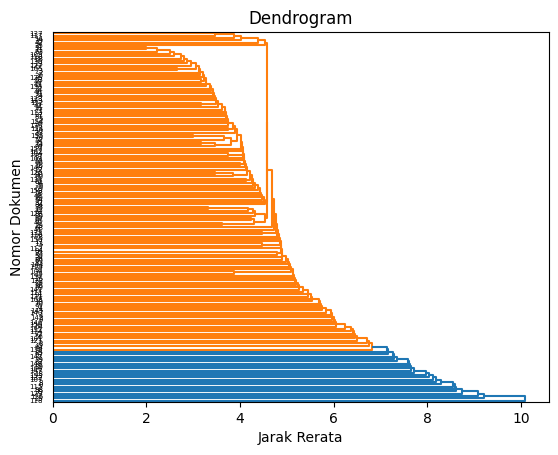

In [16]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[2 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 4 0 1 1 0 1 1 1 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 2 1 1 1 0 0 1 1 0 5 5 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 2 1 0 3 1 0 1 1 1 1 2 1 1 0 5 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 2
 1 1 1 1 1 1 1 0 1 0 1 1]


C:\Users\syahf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


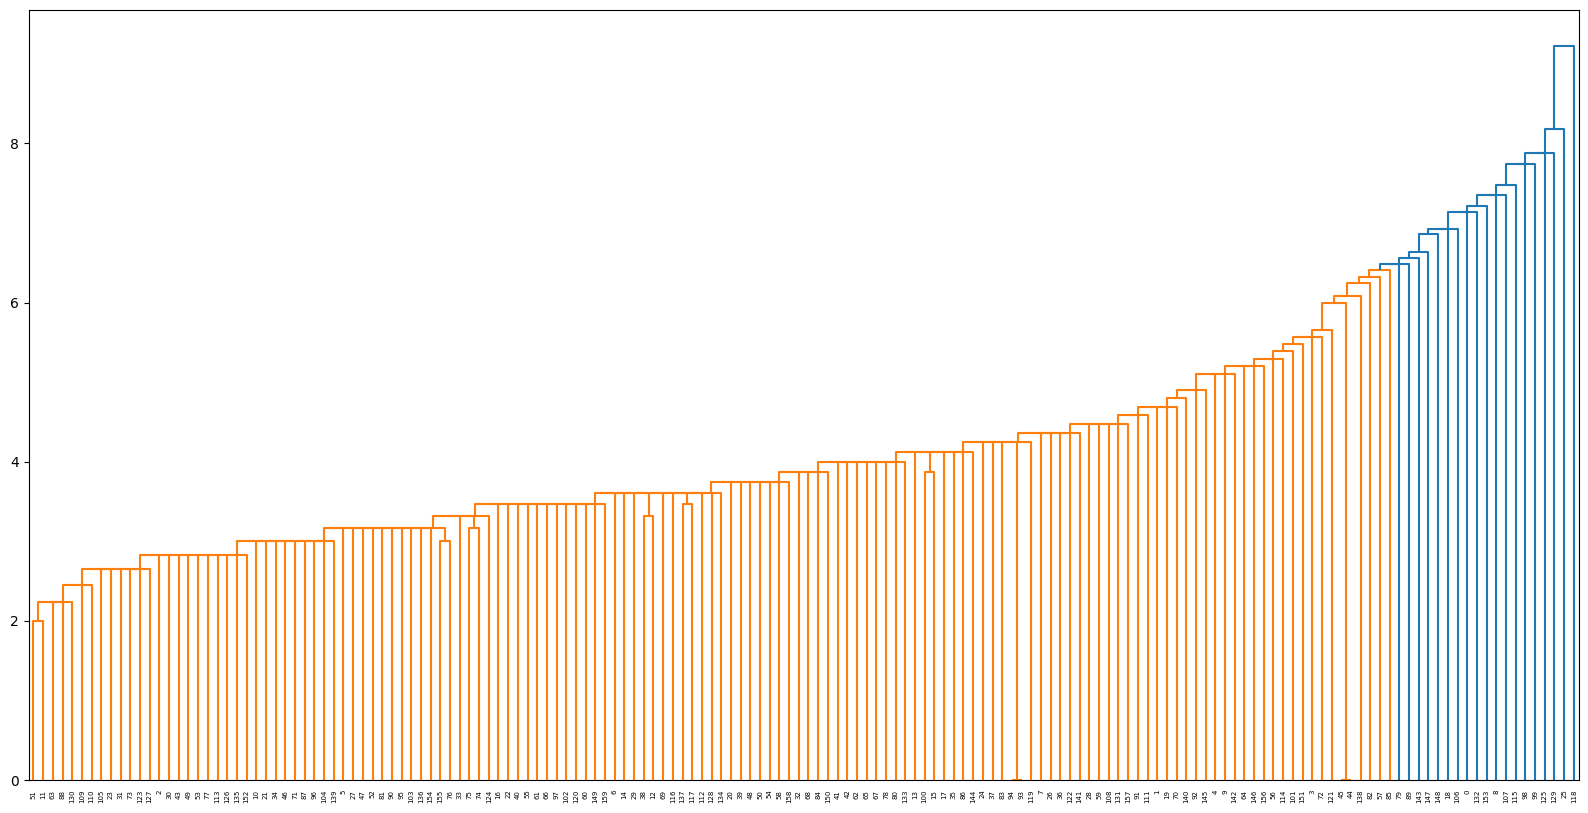

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 0 4 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\syahf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


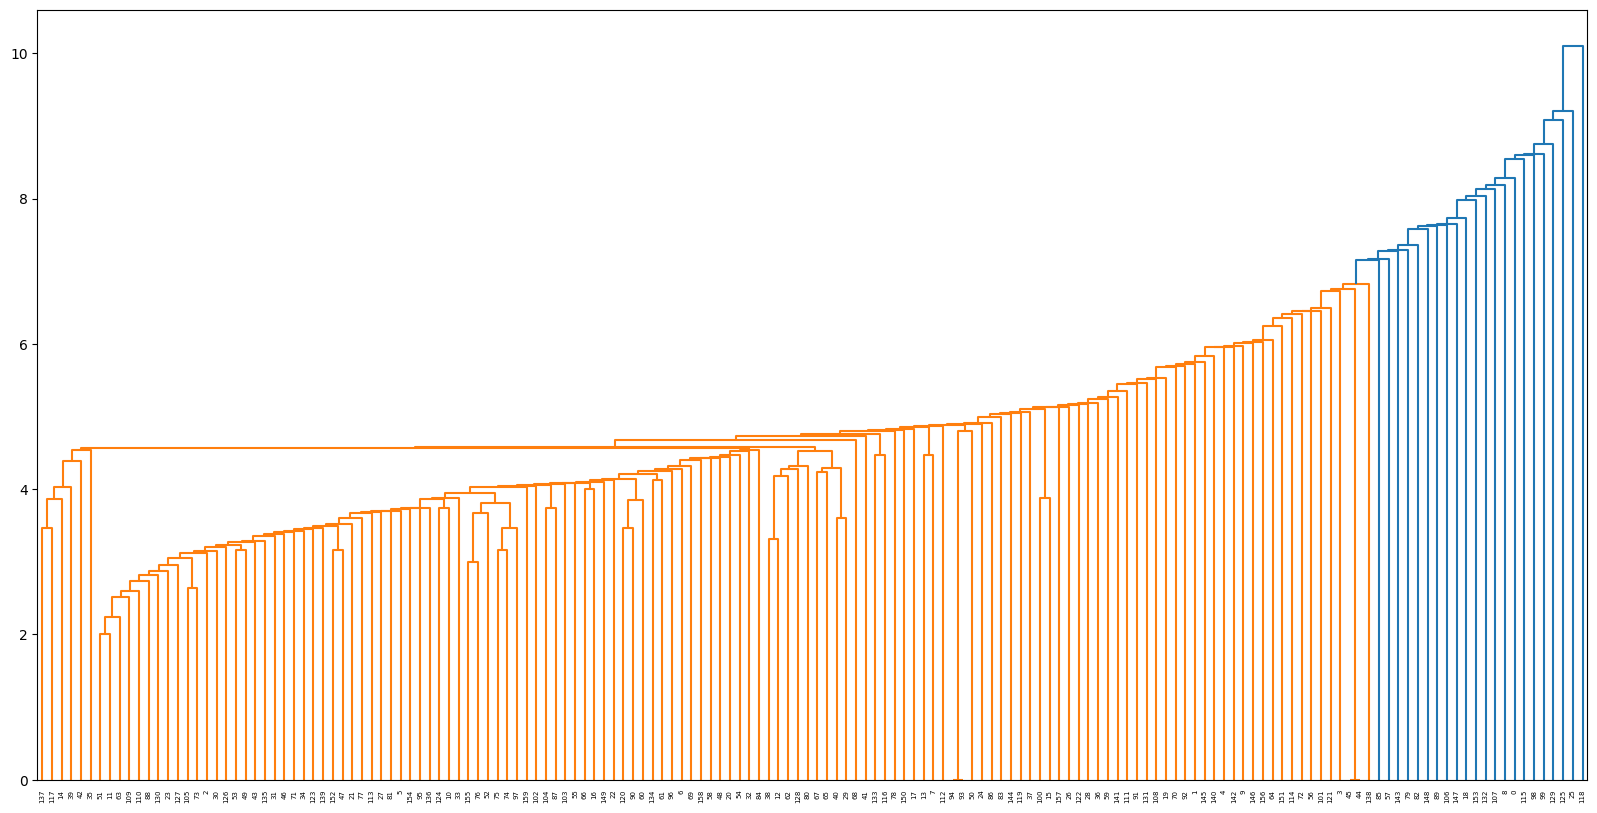

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 0 4 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\syahf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
